# Lab 7: Event Selection Optimization

Event selection optimization You and your lab partner should pick different pT (transverse momentum) samples (one uses low-pT sampels and the other use high-pT samples) for this lab. In each pT sample, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to given expected yields accordingly (See Dataset descriptions).

For this lab, I chose to work with low-PT samples. <br>
$N_{Higgs} = 100$ and $N_{QCD} = 20000$ 

In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (15,5)

In [2]:
### signal data ###

# open the file of interest, and use pickle loading
infile1 = open ('higgs_100000_pt_250_500.pkl','rb')
signal_data = pickle.load(infile1)

# list all keys of the files
# signal_data.keys()

In [3]:
### background data ###

# open the file of interest, and use pickle loading
infile2 = open ('qcd_100000_pt_250_500.pkl','rb')
background = pickle.load(infile2)

# list all keys of the files
# backgroung.keys()

### 1. Make a stacked histogram plot for the feature variable: mass
- Evaluate expected significance without any event selection. <br>
- Use Poisson statistics for significance calculation <br>
- Compare your number of  𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷).

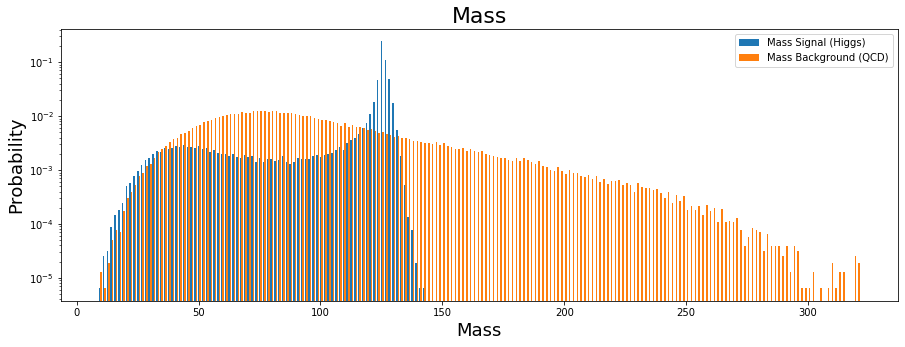

In [4]:
pt = plt.hist([signal_data['mass'], background['mass']], bins = 200, density= True)
plt.title('Mass', size=22)
plt.ylabel('Probability', size=18)
plt.xlabel('Mass', size=18)
plt.legend(['Mass Signal (Higgs)', 'Mass Background (QCD)'])
plt.yscale('log') 

$N_{Higgs} = 100$ and $N_{QCD} = 20000$ 

In [5]:
N_higgs = 100
N_qcd = 20000
tot = N_higgs + N_qcd
exp_sig = stats.norm.ppf(stats.poisson.cdf(tot, N_qcd))
print(exp_sig)

sig = 100/np.sqrt(20000)
print(sig)

#comparing the two
comp = exp_sig-sig
print(comp)

0.7112259282313185
0.7071067811865475
0.00411914704477101


In [6]:
print(len(signal_data['mass'])/N_higgs)
print(len(background['mass'])/N_qcd)

1000.0
5.0


Comparing the expected significance (number of 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷)) with our determined siginicance we get a 0.004 difference which is neglibile. 

### 2. Identify mass cuts to optimize the expected significance. 
- Try different mass cuts systematically. <br>
- Evaluate expeced significance for each set of mass cuts.<br>
- Identify the set of the mass cuts which give you the highest significance.<br>

I will systematically make mass cuts by observing the plot above and eyeing the location of signal (higgs) peak with respect to the background (QCD). The goal is to optimize the significance therefore we are trying to make cuts that are not too large so that the background isn't fully eliminated. 

In [7]:
max_val = signal_data['mass'].max()
print(max_val) 

print(signal_data['mass'][0])


sig_val = (signal_data['mass'] > 90) & (signal_data['mass'] < max_val)
sig_cut = signal_data[sig_val]
#print(sig_cut)
backg_val = (background['mass'] > 90) & (background['mass'] < max_val)
backg_cut = background[backg_val]
#print(backg_cut)

sig_yield = N_higgs * len(sig_cut)/len(signal_data)
backg_yield = N_qcd * len(backg_cut)/len(background)
print(sig_yield)
print(backg_yield)

new_N_higgs = sig_yield
new_N_qcd = backg_yield
new_tot = new_N_higgs + new_N_qcd
new_exp_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print(new_exp_sig)

142.43960717193664
125.15036485403486
86.637
6669.2
1.056523692589525


New $N_{Higgs} = 86.637$ and $N_{QCD} = 6666.92$ 

In [8]:
sig_val1 = (signal_data['mass'] > 100) & (signal_data['mass'] < 130)
sig_cut1 = signal_data[sig_val1]
#print(sig_cut)
backg_val1 = (background['mass'] > 100) & (background['mass'] < 130)
backg_cut1 = background[backg_val1]
#print(backg_cut)

sig_yield1 = N_higgs * len(sig_cut1)/len(signal_data)
backg_yield1 = N_qcd * len(backg_cut1)/len(background)
print(sig_yield1)
print(backg_yield1)

new_N_higgs = sig_yield1
new_N_qcd = backg_yield1
new_tot = new_N_higgs + new_N_qcd
new_exp_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print(new_exp_sig)

82.729
3779.6
1.3462563591936667


In [9]:
sig_val2 = (signal_data['mass'] > 120) & (signal_data['mass'] < 130)
sig_cut2 = signal_data[sig_val2]
#print(sig_cut)
backg_val2 = (background['mass'] > 120) & (background['mass'] < 130)
backg_cut2 = background[backg_val2]
#print(backg_cut)

sig_yield2 = N_higgs * len(sig_cut2)/len(signal_data)
backg_yield2 = N_qcd * len(backg_cut2)/len(background)
print(sig_yield2)
print(backg_yield2)

new_N_higgs = sig_yield2
new_N_qcd = backg_yield2
new_tot = new_N_higgs + new_N_qcd
new_exp_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print(new_exp_sig)

75.847
980.2
2.4116886489259253


In [10]:
sig_val3 = (signal_data['mass'] > 124) & (signal_data['mass'] < 127)
sig_cut3 = signal_data[sig_val3]
#print(sig_cut)
backg_val3 = (background['mass'] > 124) & (background['mass'] < 127)
backg_cut3 = background[backg_val3]
#print(backg_cut)

sig_yield3 = N_higgs * len(sig_cut3)/len(signal_data)
backg_yield3 = N_qcd * len(backg_cut3)/len(background)
print(sig_yield3)
print(backg_yield3)

new_N_higgs = sig_yield3
new_N_qcd = backg_yield3
new_tot = new_N_higgs + new_N_qcd
new_exp_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print(new_exp_sig)

53.394
291.4
3.032183893894291


The set of mass cuts that results in the highest significance is between 124 and 127 which provides a significance of 3.03-sigma. The expected signal yield is 53.392 (for higgs events) and expected background yield is 291.4 (for qcd events). <br>

I will plot 4 stacked histrograms side-by-side to reflect the different systematic mass cuts. First plot shows no plot and the fourth plot depicts the highest significance plot ranging between 124 and 127.

[]

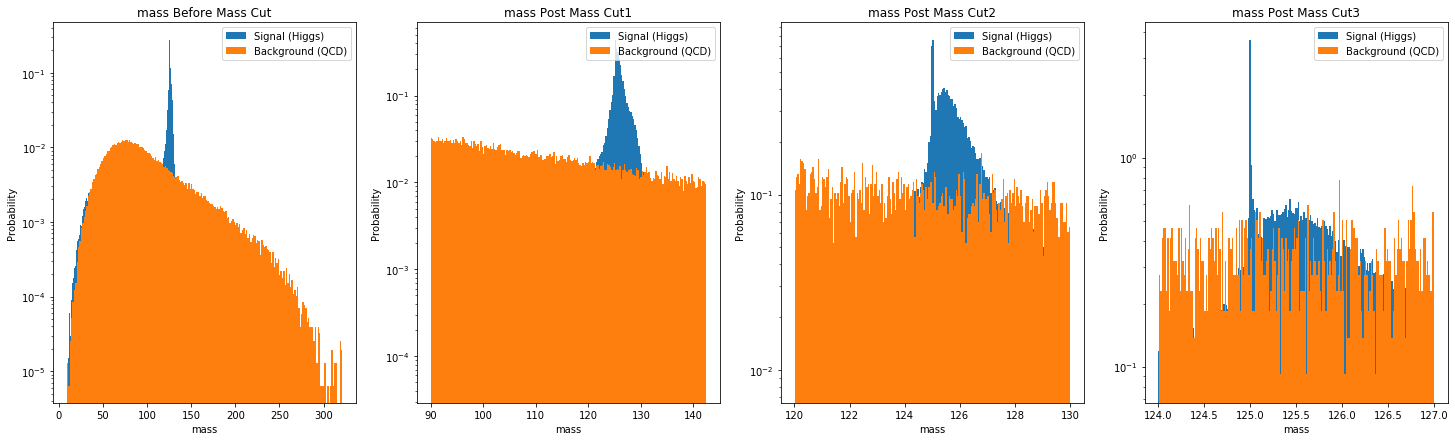

In [11]:
fig,ax = plt.subplots(1,4, figsize=(25,7))
ax[0].set_title('mass Before Mass Cut')
ax[0].hist(signal_data['mass'],bins = 200, density = 'true')
ax[0].hist(background['mass'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability')
ax[0].set_xlabel('mass')
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('mass Post Mass Cut1')
ax[1].hist(sig_cut['mass'], bins = 200, density = 'true')
ax[1].hist(backg_cut['mass'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('mass')
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

ax[2].set_title('mass Post Mass Cut2')
ax[2].hist(sig_cut2['mass'], bins = 200, density = 'true')
ax[2].hist(backg_cut2['mass'], bins = 200, density = 'true')
ax[2].set_ylabel('Probability')
ax[2].set_xlabel('mass')
ax[2].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[2].semilogy()

ax[3].set_title('mass Post Mass Cut3')
ax[3].hist(sig_cut3['mass'], bins = 200, density = 'true')
ax[3].hist(backg_cut3['mass'], bins = 200, density = 'true')
ax[3].set_ylabel('Probability')
ax[3].set_xlabel('mass')
ax[3].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[3].semilogy()

### 3. Make stacked histogram plots for the reset of features

- Set A of plots without any event selection 
    - Can you identify another feature as discriminative as mass feature (i.e. equal or better significance after feature cut)
<br>
- Set B of plots with your optimal mass cuts 
    - Can you identify additional feature to further imrpove expected signifiance? 
<br>

Now we will plot the stacked histrograms for the rest of the 13 features prior to making any cuts (on left side) and with optimal mass cuts that range between 124 and 127 (on right side), as we determined earlier. 

[]

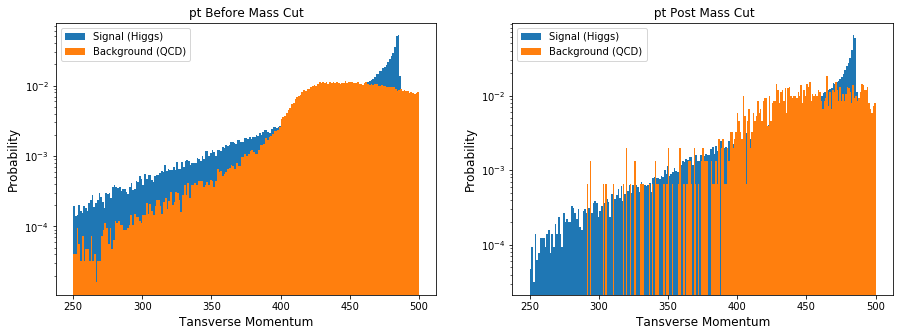

In [12]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('pt Before Mass Cut')
ax[0].hist(signal_data['pt'],bins = 200, density = 'true')
ax[0].hist(background['pt'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('Tansverse Momentum', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper left')
ax[0].semilogy()

ax[1].set_title(' pt Post Mass Cut')
ax[1].hist(sig_cut3['pt'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['pt'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('Tansverse Momentum', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper left')
ax[1].semilogy()

[]

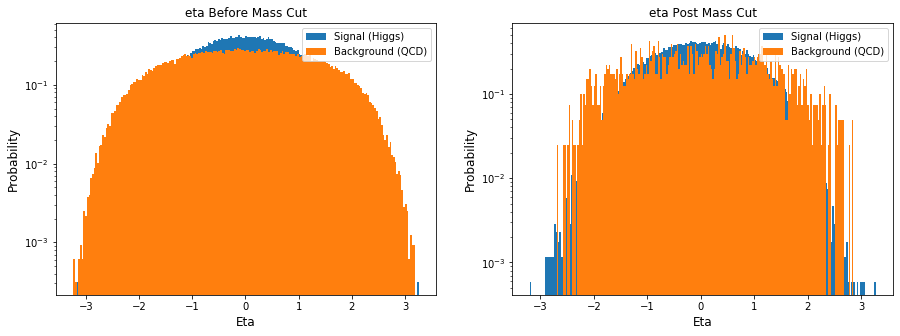

In [13]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('eta Before Mass Cut')
ax[0].hist(signal_data['eta'],bins = 200, density = 'true')
ax[0].hist(background['eta'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('Eta', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('eta Post Mass Cut')
ax[1].hist(sig_cut3['eta'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['eta'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('Eta', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

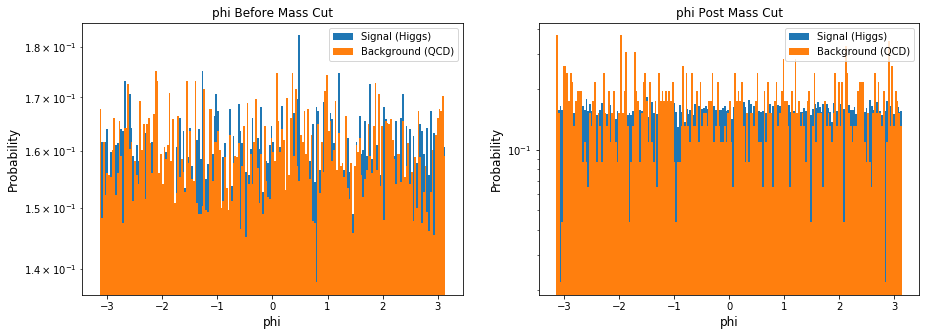

In [14]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('phi Before Mass Cut')
ax[0].hist(signal_data['phi'],bins = 200, density = 'true')
ax[0].hist(background['phi'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('phi', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('phi Post Mass Cut')
ax[1].hist(sig_cut3['phi'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['phi'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('phi', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

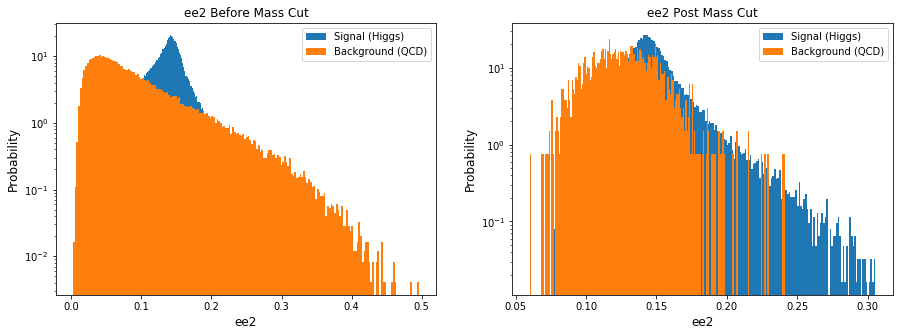

In [15]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('ee2 Before Mass Cut')
ax[0].hist(signal_data['ee2'],bins = 200, density = 'true')
ax[0].hist(background['ee2'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('ee2', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('ee2 Post Mass Cut')
ax[1].hist(sig_cut3['ee2'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['ee2'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('ee2', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

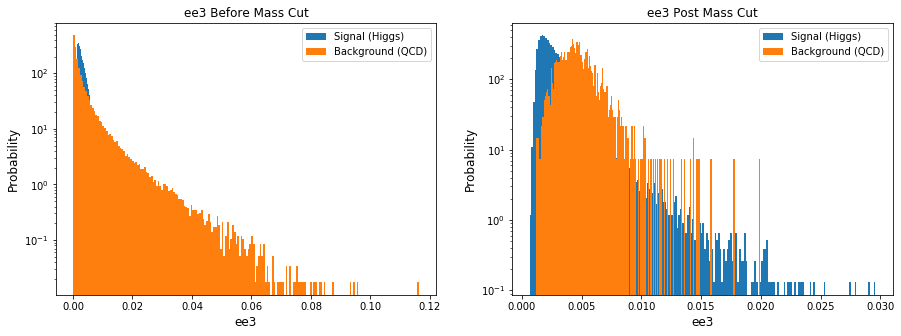

In [16]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('ee3 Before Mass Cut')
ax[0].hist(signal_data['ee3'],bins = 200, density = 'true')
ax[0].hist(background['ee3'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('ee3', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('ee3 Post Mass Cut')
ax[1].hist(sig_cut3['ee3'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['ee3'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('ee3', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

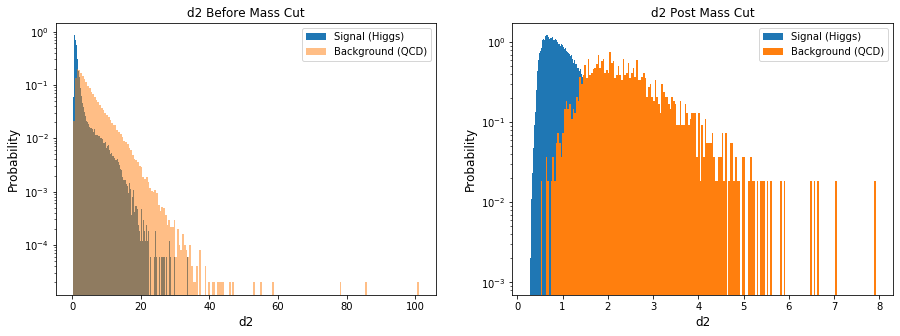

In [17]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('d2 Before Mass Cut')
ax[0].hist(signal_data['d2'],bins = 200, density = 'true')
ax[0].hist(background['d2'],bins = 200, density = 'true', alpha=.5)
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('d2', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('d2 Post Mass Cut')
ax[1].hist(sig_cut3['d2'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['d2'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('d2', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

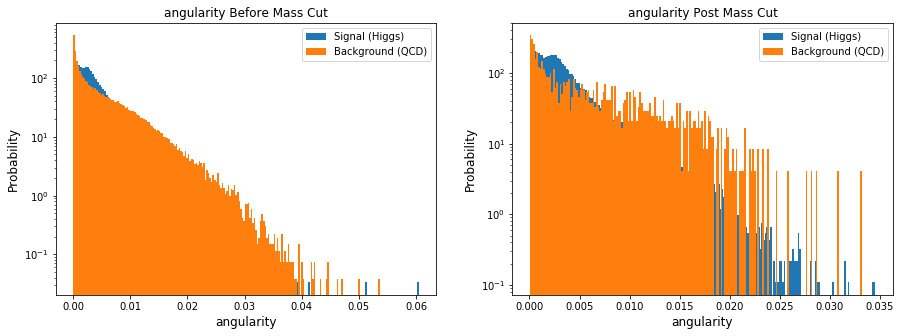

In [18]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('angularity Before Mass Cut')
ax[0].hist(signal_data['angularity'],bins = 200, density = 'true')
ax[0].hist(background['angularity'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('angularity', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('angularity Post Mass Cut')
ax[1].hist(sig_cut3['angularity'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['angularity'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('angularity', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

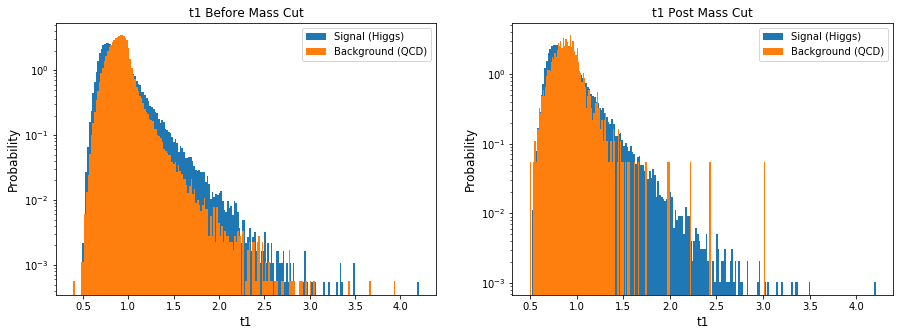

In [19]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('t1 Before Mass Cut')
ax[0].hist(signal_data['t1'],bins = 200, density = 'true')
ax[0].hist(background['t1'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t1', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('t1 Post Mass Cut')
ax[1].hist(sig_cut3['t1'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t1'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t1', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

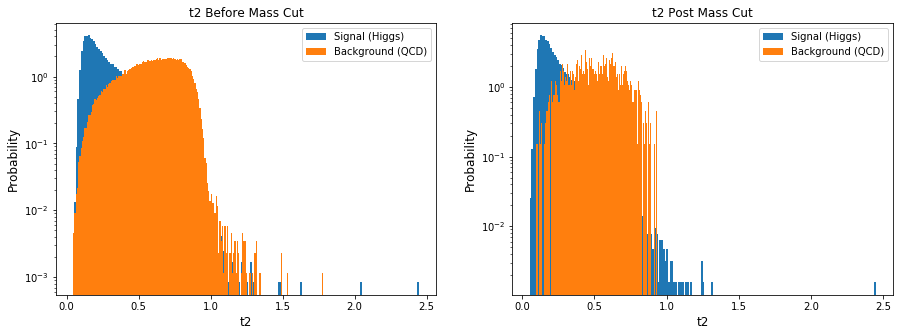

In [20]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('t2 Before Mass Cut')
ax[0].hist(signal_data['t2'],bins = 200, density = 'true')
ax[0].hist(background['t2'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t2', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('t2 Post Mass Cut')
ax[1].hist(sig_cut3['t2'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t2'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t2', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

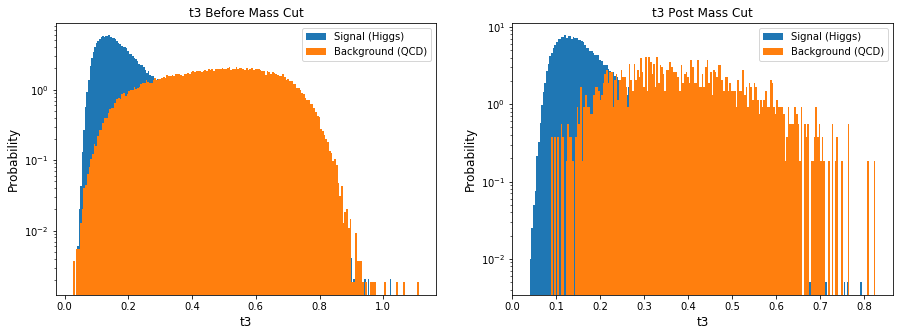

In [21]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('t3 Before Mass Cut')
ax[0].hist(signal_data['t3'],bins = 200, density = 'true')
ax[0].hist(background['t3'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t3', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('t3 Post Mass Cut')
ax[1].hist(sig_cut3['t3'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t3'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t3', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

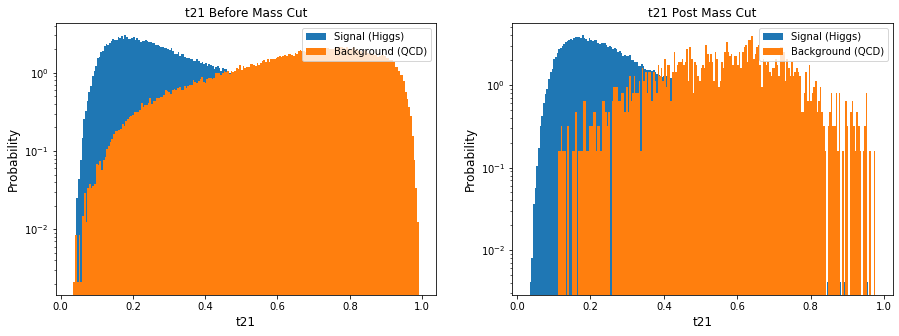

In [22]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('t21 Before Mass Cut')
ax[0].hist(signal_data['t21'],bins = 200, density = 'true')
ax[0].hist(background['t21'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t21', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('t21 Post Mass Cut')
ax[1].hist(sig_cut3['t21'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t21'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t21', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

[]

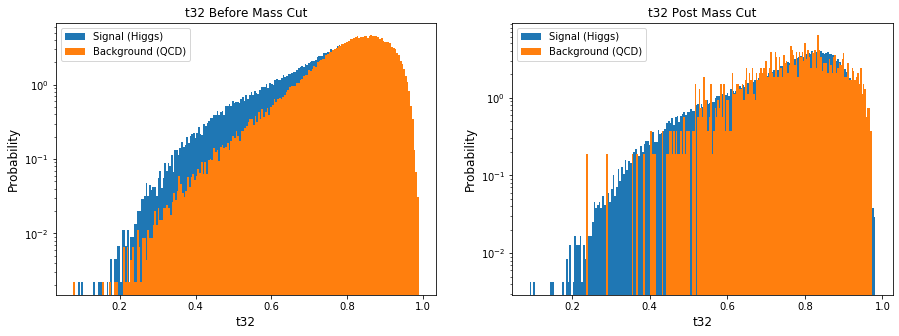

In [23]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('t32 Before Mass Cut')
ax[0].hist(signal_data['t32'],bins = 200, density = 'true')
ax[0].hist(background['t32'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t32', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper left')
ax[0].semilogy()

ax[1].set_title('t32 Post Mass Cut')
ax[1].hist(sig_cut3['t32'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t32'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t32', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper left')
ax[1].semilogy()

[]

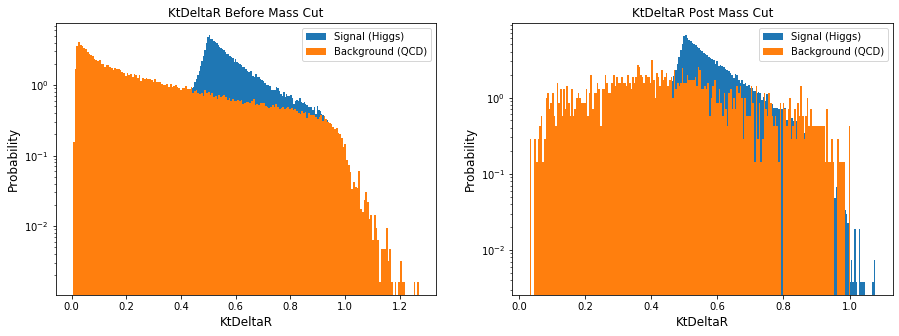

In [24]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('KtDeltaR Before Mass Cut')
ax[0].hist(signal_data['KtDeltaR'],bins = 200, density = 'true')
ax[0].hist(background['KtDeltaR'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('KtDeltaR', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('KtDeltaR Post Mass Cut')
ax[1].hist(sig_cut3['KtDeltaR'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['KtDeltaR'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('KtDeltaR', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)'], loc = 'upper right')
ax[1].semilogy()

Observing the peaks of the "before mass cut" plots above, we are able to deduce that the features: ee2, t2, t3, t21, and KDeltaR can be used to discriminate the signal (Higgs) from the background (QCD) since thier peaks are slightly (or more than slightly) offset. <br>
<br>
Applying the same logic and observing the "post mass cut" plots above, we can see that the features: d2, t2, t3, and t21 would be useful features to aid in improving the significance post mass cut due to the presence of peaks that are still slightly offset.

### 4. Optimize event selections using multiple features (if necessary)
- Find a set of feature cuts which can help you to achieve the best significance.<br>
- Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings

Here, we will use mass cut data and apply additional cuts with respect to the features we determined in the previous problem that could aid in optimizing significance. I determined the value of the cuts by eyeing the post mass cut plots above and altering the ranges accordingly via trial and error. <br>
<br>
First, I took the features: d2, t2, t3, and t21 (as determined earlier to have the highest potential of improving the significance) and applied additional cuts with their respective feature (this includes the mass cut). I then determined their optimal significance value and compared these four features with each other to determine the feature cut that will result in the best significance. <br>
<br>
The goal is to minimize the background and optimize the signal to noise ratio. 

In [25]:
max_val = sig_cut3['d2'].max()
print(max_val) 

print(sig_cut3['d2'][0])
low_val = sig_cut3['d2'][0]


sig_val = (sig_cut3['d2'] > .5) & (sig_cut3['d2'] < 1.5)
sig_cut = sig_cut3[sig_val]
#print(sig_cut)
backg_val = (backg_cut3['d2'] > .5) & (backg_cut3['d2'] < 1.5)
backg_cut = backg_cut3[backg_val]
#print(backg_cut)

sig_yield = N_higgs * len(sig_cut)/len(signal_data)
backg_yield = N_qcd * len(backg_cut)/len(background)
print(sig_yield)
print(backg_yield)

new_N_higgs = sig_yield
new_N_qcd = backg_yield
new_tot = new_N_higgs + new_N_qcd
new_exp_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print("Significance: " + str(new_exp_sig))

4.017907068409984
1.2980200835589373
43.882
34.8
Significance: 6.373843645530709


In [26]:
max_val = sig_cut3['t2'].max()
print(max_val) 

print(sig_cut3['t2'][0])
low_val = sig_cut3['t2'][0]


sig_val = (sig_cut3['t2'] > .05) & (sig_cut3['t2'] < .2)
sig_cut = sig_cut3[sig_val]
#print(sig_cut)
backg_val = (backg_cut3['t2'] > .05) & (backg_cut3['t2'] < .2)
backg_cut = backg_cut3[backg_val]
#print(backg_cut)

sig_yield = N_higgs * len(sig_cut)/len(signal_data)
backg_yield = N_qcd * len(backg_cut)/len(background)
print(sig_yield)
print(backg_yield)

new_N_higgs = sig_yield
new_N_qcd = backg_yield
new_tot = new_N_higgs + new_N_qcd
new_exp_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print("Significance: " + str(new_exp_sig))

2.446423676052458
0.2836889492256516
26.705
7.6
Significance: 7.156842947899251


In [27]:
max_val = sig_cut3['t3'].max()
print(max_val) 

print(sig_cut3['t3'][0])
low_val = sig_cut3['t3'][0]


sig_val = (sig_cut3['t3'] > .05) & (sig_cut3['t3'] < .15)
sig_cut = sig_cut3[sig_val]
#print(sig_cut)
backg_val = (backg_cut3['t3'] > .05) & (backg_cut3['t3'] < .15)
backg_cut = backg_cut3[backg_val]
#print(backg_cut)

sig_yield = N_higgs * len(sig_cut)/len(signal_data)
backg_yield = N_qcd * len(backg_cut)/len(background)
print(sig_yield)
print(backg_yield)

new_N_higgs = sig_yield
new_N_qcd = backg_yield
new_tot = new_N_higgs + new_N_qcd
new_exp_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print("Significance: " + str(new_exp_sig))

0.7947510641556579
0.17494364396910958
25.778
5.4
Significance: 7.725949887459127


In [28]:
max_val = sig_cut3['t21'].max()
print(max_val) 

print(sig_cut3['t21'][0])
low_val = sig_cut3['t21'][0]


sig_val = (sig_cut3['t21'] > .03) & (sig_cut3['t21'] < .25)
sig_cut = sig_cut3[sig_val]
#print(sig_cut)
backg_val = (backg_cut3['t21'] > .03) & (backg_cut3['t21'] < .25)
backg_cut = backg_cut3[backg_val]
#print(backg_cut)

sig_yield = N_higgs * len(sig_cut)/len(signal_data)
backg_yield = N_qcd * len(backg_cut)/len(background)
print(sig_yield)
print(backg_yield)

new_N_higgs = sig_yield
new_N_qcd = backg_yield
new_tot = new_N_higgs + new_N_qcd
new_exp_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print("Significance: " + str(new_exp_sig))

0.9555549367887204
0.3834739011002356
28.549
11.0
Significance: 6.671934287355631


Comparing the significance values above, we see that the feature t3 along with its t3 cut would be the best feature to use post mass cut to optimize the significance as its significance value is 7.7-sigma with a cut range of 0.05 and 0.15. <br>
<br>
For the low PT samples, before the cuts, the expected siginificance was .7-sigma. After making mass cuts and t3 cuts I was able to increase the expected significance up to 7.7-sigma. <br.
For the high PT samples, before the cuts, the expected significance was 1.1-sigma, after applying cuts the expected significance was optimized to 6.7-sigma. 

# Lab 8: Pseudo-experiment Data Analysis 

In [29]:
import h5py
import statistics
import math
import pandas
import scipy.signal

In [30]:
high_lum = pd.read_hdf('data_highLumi_pt_250_500.h5')
low_lum = pd.read_hdf('data_lowLumi_pt_250_500.h5')

#pd.DataFrame(high_lum_data)
#pd.DataFrame(low_lum_data)

#### 1. High Luminosity Data
- Focus on each feature of your event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
- Evaluate observed significance and compare your results to expectation

In [31]:
N_higgs = 100
N_qcd = 20000

new_N_higgs = N_higgs * (len(high_lum['mass'])/len(signal_data['mass']))
new_N_qcd = N_qcd * (len(high_lum['mass'])/len(background['mass']))
new_tot = new_N_higgs + new_N_qcd
new_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print(new_N_higgs)
print(new_N_qcd)
print(new_sig)

40.344
8068.8
0.45456947909413586


[]

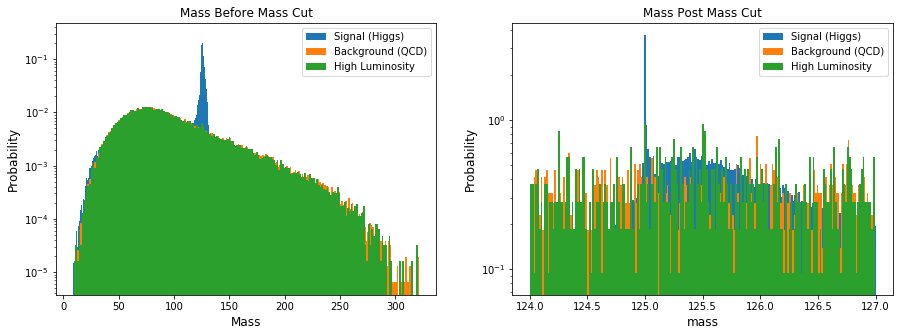

In [32]:
#mass cut
hl_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127)
hl_cut = high_lum[hl_val]

fig,ax = plt.subplots(1,2)
ax[0].set_title('Mass Before Mass Cut')
ax[0].hist(signal_data['mass'],bins = 200, density = 'true')
ax[0].hist(background['mass'],bins = 200, density = 'true')
ax[0].hist(high_lum['mass'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('Mass', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('Mass Post Mass Cut')
ax[1].hist(sig_cut3['mass'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['mass'], bins = 200, density = 'true')
ax[1].hist(hl_cut['mass'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('mass', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()

(350, 500)

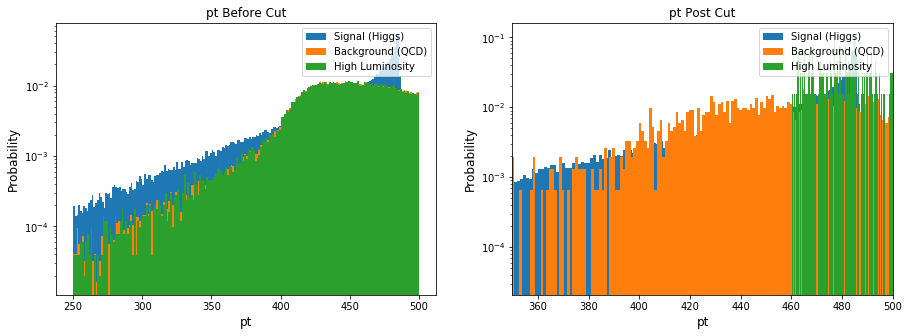

In [33]:
#pt cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_pt = high_cut['pt']
high_pt_and_mass_cut = high_pt[(high_pt < 500) & (high_pt > 460)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('pt Before Cut')
ax[0].hist(signal_data['pt'],bins = 200, density = 'true')
ax[0].hist(background['pt'],bins = 200, density = 'true')
ax[0].hist(high_lum['pt'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('pt', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('pt Post Cut')
ax[1].hist(sig_cut3['pt'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['pt'], bins = 200, density = 'true')
ax[1].hist(high_pt_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('pt', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()
ax[1].set_xlim([350, 500])

[]

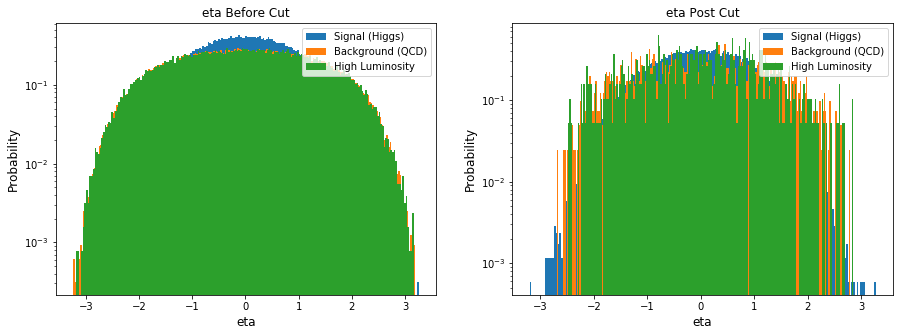

In [34]:
#eta cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_eta = high_cut['eta']
high_eta_and_mass_cut = high_eta[(high_eta < 3) & (high_eta > -3)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('eta Before Cut')
ax[0].hist(signal_data['eta'],bins = 200, density = 'true')
ax[0].hist(background['eta'],bins = 200, density = 'true')
ax[0].hist(high_lum['eta'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('eta', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('eta Post Cut')
ax[1].hist(sig_cut3['eta'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['eta'], bins = 200, density = 'true')
ax[1].hist(high_eta_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('eta', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()

[]

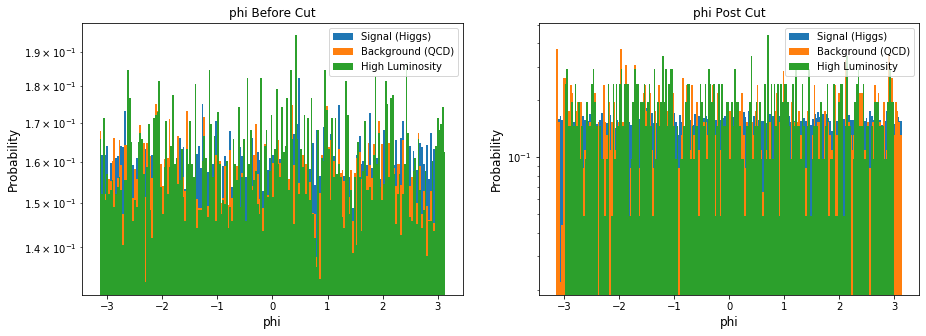

In [35]:
#phi cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_phi = high_cut['phi']
high_phi_and_mass_cut = high_phi[(high_phi < 3) & (high_phi > -3)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('phi Before Cut')
ax[0].hist(signal_data['phi'],bins = 200, density = 'true')
ax[0].hist(background['phi'],bins = 200, density = 'true')
ax[0].hist(high_lum['phi'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('phi', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('phi Post Cut')
ax[1].hist(sig_cut3['phi'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['phi'], bins = 200, density = 'true')
ax[1].hist(high_phi_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('phi', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()

[]

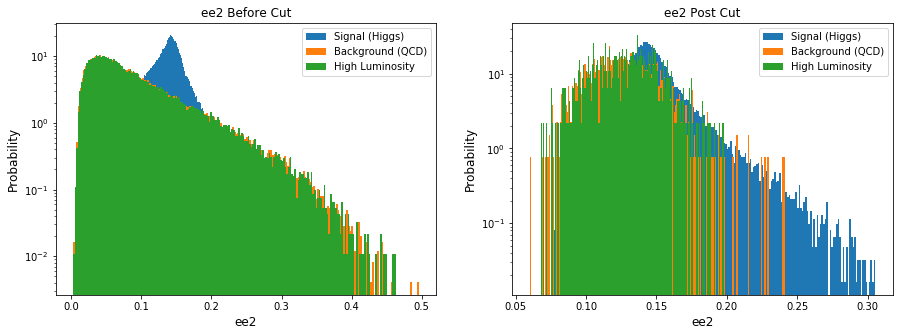

In [36]:
#ee2 cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_ee2 = high_cut['ee2']
high_ee2_and_mass_cut = high_ee2[(high_ee2 < .2) & (high_ee2 > 0.04)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('ee2 Before Cut')
ax[0].hist(signal_data['ee2'],bins = 200, density = 'true')
ax[0].hist(background['ee2'],bins = 200, density = 'true')
ax[0].hist(high_lum['ee2'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('ee2', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('ee2 Post Cut')
ax[1].hist(sig_cut3['ee2'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['ee2'], bins = 200, density = 'true')
ax[1].hist(high_ee2_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('ee2', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()

[]

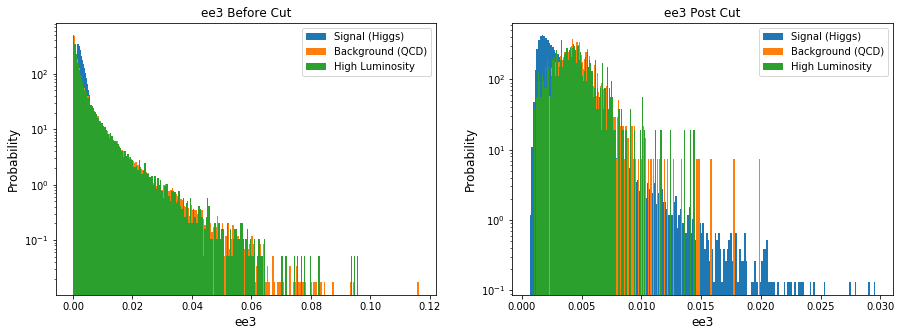

In [37]:
#ee3 cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_ee3 = high_cut['ee3']
high_ee3_and_mass_cut = high_ee3[(high_ee3 < .02) & (high_ee3 > 0.0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('ee3 Before Cut')
ax[0].hist(signal_data['ee3'],bins = 200, density = 'true')
ax[0].hist(background['ee3'],bins = 200, density = 'true')
ax[0].hist(high_lum['ee3'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('ee3', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('ee3 Post Cut')
ax[1].hist(sig_cut3['ee3'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['ee3'], bins = 200, density = 'true')
ax[1].hist(high_ee3_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('ee3', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()

(0.25, 1)

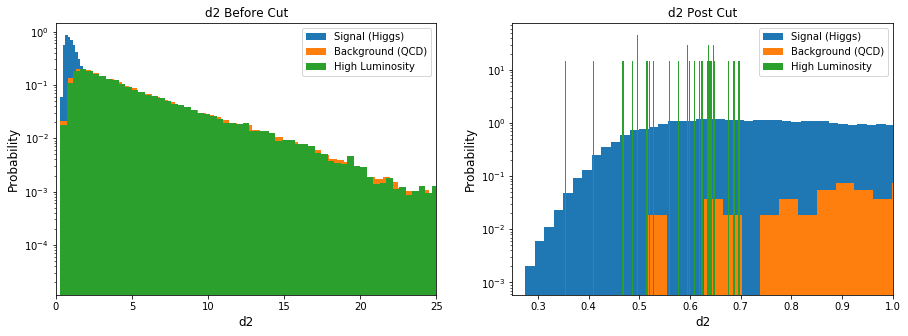

In [38]:
#d2 cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_d2 = high_cut['d2']
high_d2_and_mass_cut = high_d2[(high_d2 < .7) & (high_d2 >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('d2 Before Cut')
ax[0].hist(signal_data['d2'],bins = 200, density = 'true')
ax[0].hist(background['d2'],bins = 200, density = 'true')
ax[0].hist(high_lum['d2'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('d2', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()
ax[0].set_xlim([0, 25])

ax[1].set_title('d2 Post Cut')
ax[1].hist(sig_cut3['d2'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['d2'], bins = 200, density = 'true')
ax[1].hist(high_d2_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('d2', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()
ax[1].set_xlim([0.25, 1])

[]

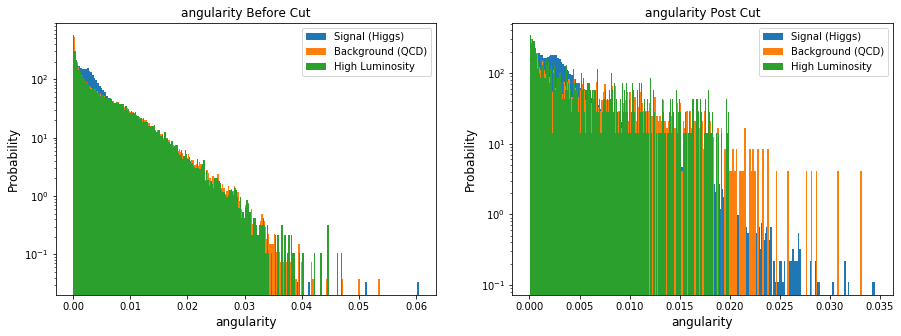

In [39]:
#angularity cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_ang = high_cut['angularity']
high_ang_and_mass_cut = high_ang[(high_ang < .02) & (high_ang >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('angularity Before Cut')
ax[0].hist(signal_data['angularity'],bins = 200, density = 'true')
ax[0].hist(background['angularity'],bins = 200, density = 'true')
ax[0].hist(high_lum['angularity'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('angularity', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('angularity Post Cut')
ax[1].hist(sig_cut3['angularity'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['angularity'], bins = 200, density = 'true')
ax[1].hist(high_ang_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('angularity', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

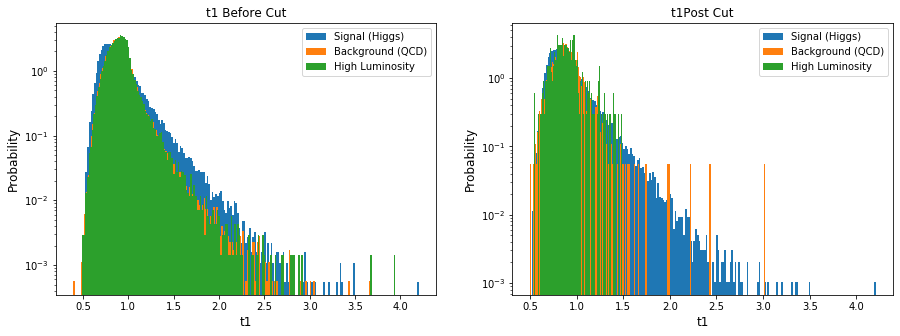

In [40]:
#t1 cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_t1 = high_cut['t1']
high_t1_and_mass_cut = high_t1[(high_t1 < 1.5) & (high_t1 >0.5)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t1 Before Cut')
ax[0].hist(signal_data['t1'],bins = 200, density = 'true')
ax[0].hist(background['t1'],bins = 200, density = 'true')
ax[0].hist(high_lum['t1'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t1', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t1Post Cut')
ax[1].hist(sig_cut3['t1'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t1'], bins = 200, density = 'true')
ax[1].hist(high_t1_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t1', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

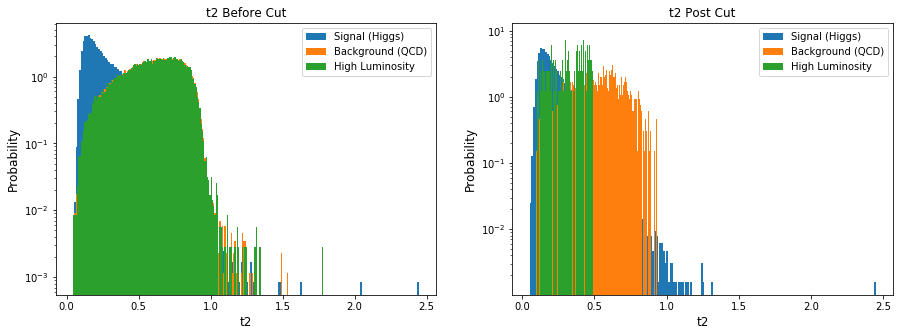

In [41]:
#t2 cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_t2 = high_cut['t2']
high_t2_and_mass_cut = high_t2[(high_t2 < .5) & (high_t2 >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t2 Before Cut')
ax[0].hist(signal_data['t2'],bins = 200, density = 'true')
ax[0].hist(background['t2'],bins = 200, density = 'true')
ax[0].hist(high_lum['t2'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t2', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t2 Post Cut')
ax[1].hist(sig_cut3['t2'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t2'], bins = 200, density = 'true')
ax[1].hist(high_t2_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t2', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

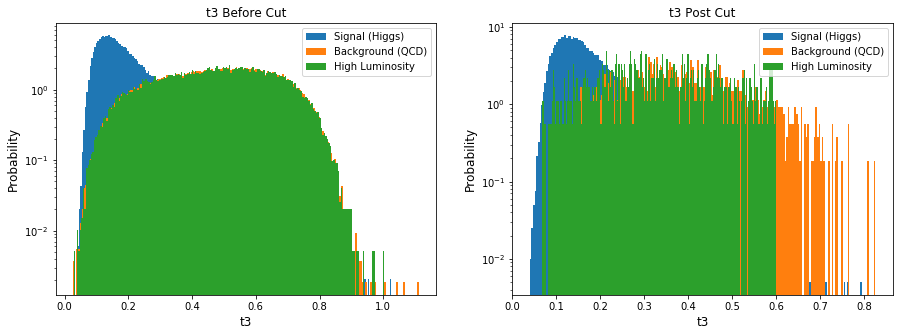

In [42]:
#t3 cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_t3 = high_cut['t3']
high_t3_and_mass_cut = high_t3[(high_t3 < .6) & (high_t3 >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t3 Before Cut')
ax[0].hist(signal_data['t3'],bins = 200, density = 'true')
ax[0].hist(background['t3'],bins = 200, density = 'true')
ax[0].hist(high_lum['t3'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t3', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t3 Post Cut')
ax[1].hist(sig_cut3['t3'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t3'], bins = 200, density = 'true')
ax[1].hist(high_t3_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t3', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

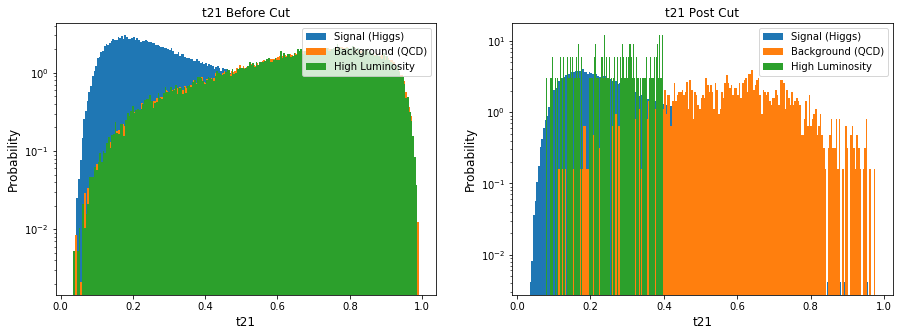

In [43]:
#t21 cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_t21 = high_cut['t21']
high_t21_and_mass_cut = high_t21[(high_t21 < .4) & (high_t21 >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t21 Before Cut')
ax[0].hist(signal_data['t21'],bins = 200, density = 'true')
ax[0].hist(background['t21'],bins = 200, density = 'true')
ax[0].hist(high_lum['t21'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t21', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t21 Post Cut')
ax[1].hist(sig_cut3['t21'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t21'], bins = 200, density = 'true')
ax[1].hist(high_t21_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t21', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

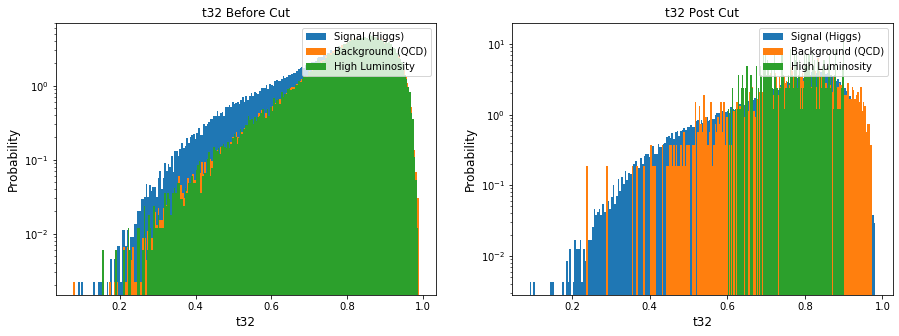

In [44]:
#t32 cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_t32 = high_cut['t32']
high_t32_and_mass_cut = high_t32[(high_t32 < .9) & (high_t32 >0.6)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t32 Before Cut')
ax[0].hist(signal_data['t32'],bins = 200, density = 'true')
ax[0].hist(background['t32'],bins = 200, density = 'true')
ax[0].hist(high_lum['t32'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t32', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t32 Post Cut')
ax[1].hist(sig_cut3['t32'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t32'], bins = 200, density = 'true')
ax[1].hist(high_t32_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t32', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

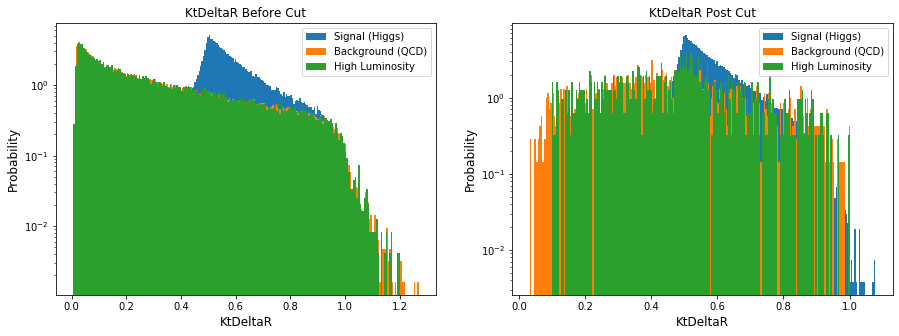

In [45]:
#KtDeltaR cut
high_val = (high_lum['mass'] > 124) & (high_lum['mass'] < 127) 
high_cut = high_lum[high_val]
high_KtDeltaR = high_cut['KtDeltaR']
high_KtDeltaR_and_mass_cut = high_KtDeltaR[(high_KtDeltaR < 1) & (high_KtDeltaR >0.1)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('KtDeltaR Before Cut')
ax[0].hist(signal_data['KtDeltaR'],bins = 200, density = 'true')
ax[0].hist(background['KtDeltaR'],bins = 200, density = 'true')
ax[0].hist(high_lum['KtDeltaR'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('KtDeltaR', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('KtDeltaR Post Cut')
ax[1].hist(sig_cut3['KtDeltaR'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['KtDeltaR'], bins = 200, density = 'true')
ax[1].hist(high_KtDeltaR_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('KtDeltaR', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'High Luminosity'], loc = 'upper right')
ax[1].semilogy()


#### 2. Low Luminosity Data
- Focus on each feature of your event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
- Evaluate observed significance and compare your results to expectation

In [46]:
N_higgs = 100
N_qcd = 20000

new_N_higgs = N_higgs * (len(low_lum['mass'])/len(signal_data['mass']))
new_N_qcd = N_qcd * (len(low_lum['mass'])/len(background['mass']))
new_tot = new_N_higgs + new_N_qcd
new_sig = stats.norm.ppf(stats.poisson.cdf(new_tot, new_N_qcd))
print(new_N_higgs)
print(new_N_qcd)
print(new_sig)

4.06
812.0
0.16361782787375587


[]

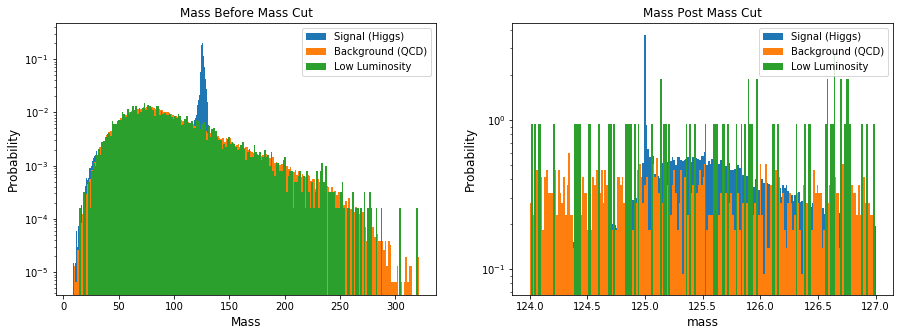

In [47]:
#mass cut
ll_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127)
ll_cut = low_lum[ll_val]


fig,ax = plt.subplots(1,2)
ax[0].set_title('Mass Before Mass Cut')
ax[0].hist(signal_data['mass'],bins = 200, density = 'true')
ax[0].hist(background['mass'],bins = 200, density = 'true')
ax[0].hist(low_lum['mass'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('Mass', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('Mass Post Mass Cut')
ax[1].hist(sig_cut3['mass'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['mass'], bins = 200, density = 'true')
ax[1].hist(ll_cut['mass'], bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('mass', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()

(350, 500)

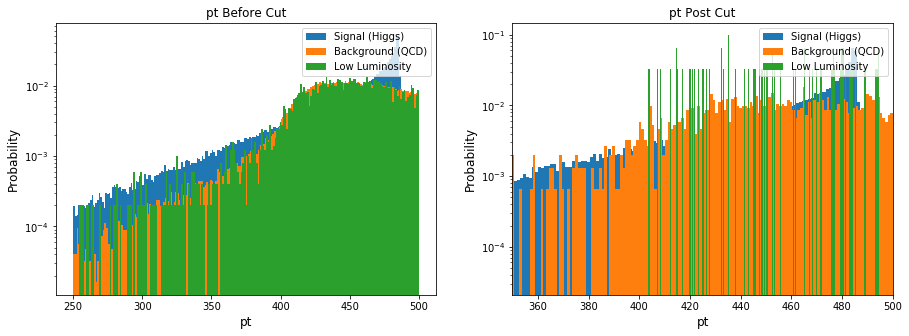

In [48]:
#pt cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_pt = low_cut['pt']
low_pt_and_mass_cut = low_pt[(low_pt < 500) & (low_pt > 400)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('pt Before Cut')
ax[0].hist(signal_data['pt'],bins = 200, density = 'true')
ax[0].hist(background['pt'],bins = 200, density = 'true')
ax[0].hist(low_lum['pt'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('pt', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('pt Post Cut')
ax[1].hist(sig_cut3['pt'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['pt'], bins = 200, density = 'true')
ax[1].hist(low_pt_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('pt', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()
ax[1].set_xlim([350, 500])

[]

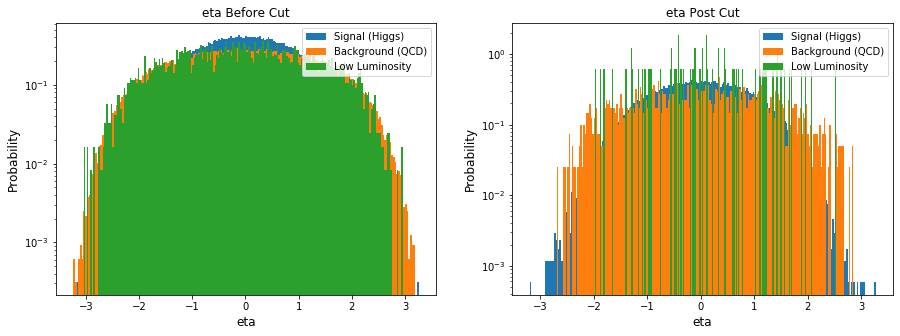

In [49]:
#eta cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_eta = low_cut['eta']
low_eta_and_mass_cut = low_eta[(low_eta < 3) & (low_eta > -3)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('eta Before Cut')
ax[0].hist(signal_data['eta'],bins = 200, density = 'true')
ax[0].hist(background['eta'],bins = 200, density = 'true')
ax[0].hist(low_lum['eta'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('eta', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('eta Post Cut')
ax[1].hist(sig_cut3['eta'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['eta'], bins = 200, density = 'true')
ax[1].hist(low_eta_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('eta', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()

/Users/evelenaburunova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


[]

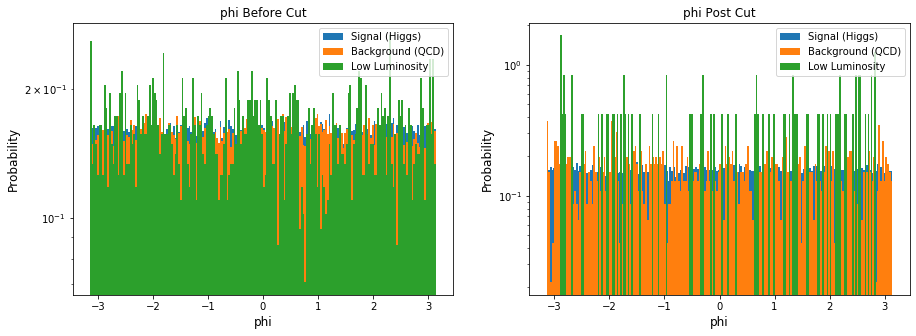

In [50]:
#phi cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[high_val]
low_phi = low_cut['phi']
low_phi_and_mass_cut = low_phi[(low_phi < 3) & (low_phi > -3)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('phi Before Cut')
ax[0].hist(signal_data['phi'],bins = 200, density = 'true')
ax[0].hist(background['phi'],bins = 200, density = 'true')
ax[0].hist(low_lum['phi'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('phi', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('phi Post Cut')
ax[1].hist(sig_cut3['phi'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['phi'], bins = 200, density = 'true')
ax[1].hist(low_phi_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('phi', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()

(0.05, 0.225)

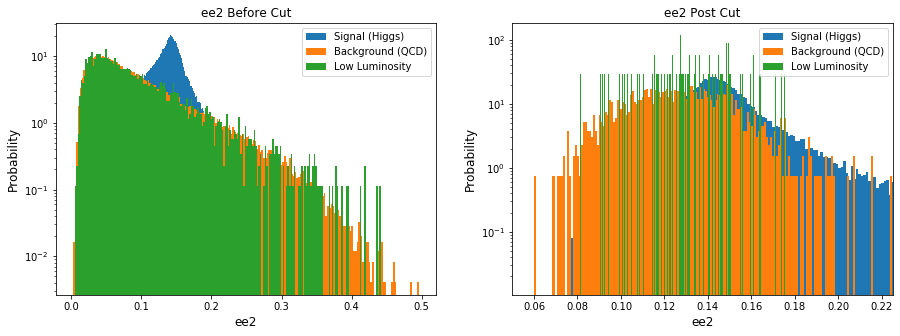

In [51]:
#ee2 cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_ee2 = low_cut['ee2']
low_ee2_and_mass_cut = low_ee2[(low_ee2 < .2) & (low_ee2 > 0)]
ob_low_sig = len(low_ee2_and_mass_cut)

fig,ax = plt.subplots(1,2)
ax[0].set_title('ee2 Before Cut')
ax[0].hist(signal_data['ee2'],bins = 200, density = 'true')
ax[0].hist(background['ee2'],bins = 200, density = 'true')
ax[0].hist(low_lum['ee2'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('ee2', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('ee2 Post Cut')
ax[1].hist(sig_cut3['ee2'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['ee2'], bins = 200, density = 'true')
ax[1].hist(low_ee2_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('ee2', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()
ax[1].set_xlim([0.05, .225])

/Users/evelenaburunova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


[]

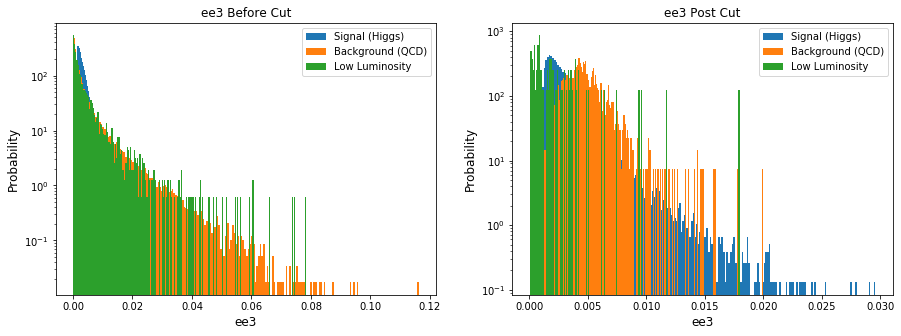

In [52]:
#ee3 cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[high_val]
low_ee3 = low_cut['ee3']
low_ee3_and_mass_cut = low_ee3[(low_ee3 < .02) & (low_ee3 > 0.0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('ee3 Before Cut')
ax[0].hist(signal_data['ee3'],bins = 200, density = 'true')
ax[0].hist(background['ee3'],bins = 200, density = 'true')
ax[0].hist(low_lum['ee3'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('ee3', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()

ax[1].set_title('ee3 Post Cut')
ax[1].hist(sig_cut3['ee3'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['ee3'], bins = 200, density = 'true')
ax[1].hist(low_ee3_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('ee3', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()

(0, 2)

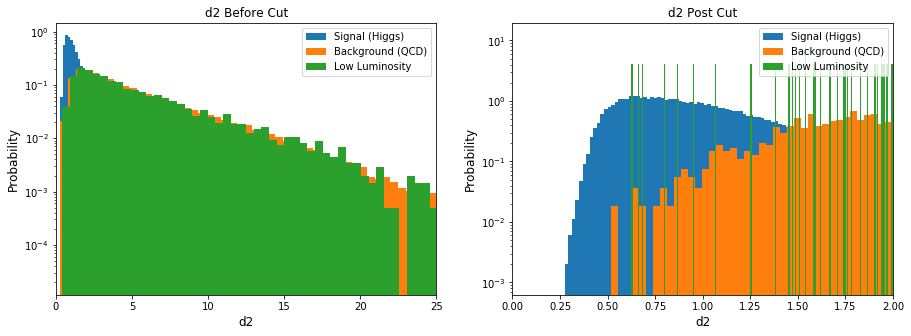

In [53]:
#d2 cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_d2 = low_cut['d2']
low_d2_and_mass_cut = low_d2[(low_d2 < 2) & (low_d2 >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('d2 Before Cut')
ax[0].hist(signal_data['d2'],bins = 200, density = 'true')
ax[0].hist(background['d2'],bins = 200, density = 'true')
ax[0].hist(low_lum['d2'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('d2', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()
ax[0].set_xlim([0, 25])

ax[1].set_title('d2 Post Cut')
ax[1].hist(sig_cut3['d2'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['d2'], bins = 200, density = 'true')
ax[1].hist(low_d2_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('d2', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()
ax[1].set_xlim([0, 2])

/Users/evelenaburunova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


[]

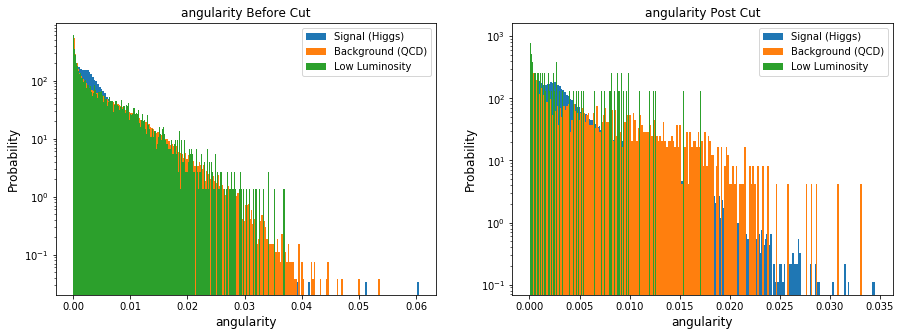

In [54]:
#angularity cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[high_val]
low_ang = low_cut['angularity']
low_ang_and_mass_cut = low_ang[(low_ang < .02) & (low_ang >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('angularity Before Cut')
ax[0].hist(signal_data['angularity'],bins = 200, density = 'true')
ax[0].hist(background['angularity'],bins = 200, density = 'true')
ax[0].hist(low_lum['angularity'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('angularity', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('angularity Post Cut')
ax[1].hist(sig_cut3['angularity'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['angularity'], bins = 200, density = 'true')
ax[1].hist(low_ang_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('angularity', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

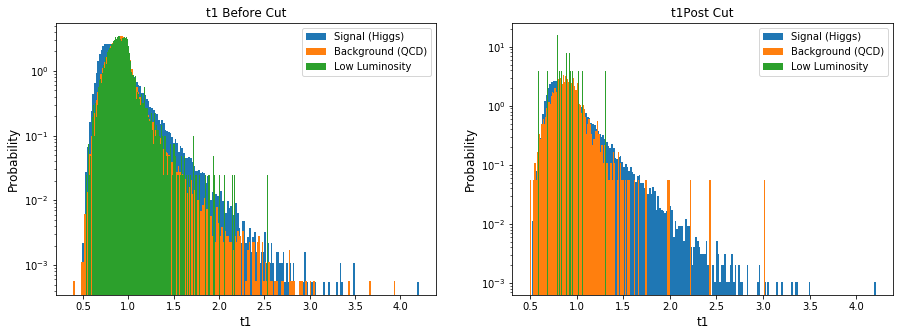

In [55]:
#t1 cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_t1 = low_cut['t1']
low_t1_and_mass_cut = low_t1[(low_t1 < 1.5) & (low_t1 >0.5)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t1 Before Cut')
ax[0].hist(signal_data['t1'],bins = 200, density = 'true')
ax[0].hist(background['t1'],bins = 200, density = 'true')
ax[0].hist(low_lum['t1'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t1', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t1Post Cut')
ax[1].hist(sig_cut3['t1'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t1'], bins = 200, density = 'true')
ax[1].hist(low_t1_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t1', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

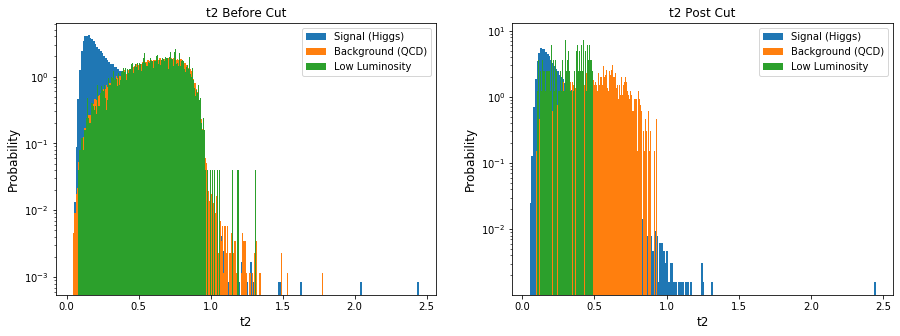

In [56]:
#t2 cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_t2 = high_cut['t2']
low_t2_and_mass_cut = low_t2[(low_t2 < .5) & (low_t2 >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t2 Before Cut')
ax[0].hist(signal_data['t2'],bins = 200, density = 'true')
ax[0].hist(background['t2'],bins = 200, density = 'true')
ax[0].hist(low_lum['t2'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t2', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t2 Post Cut')
ax[1].hist(sig_cut3['t2'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t2'], bins = 200, density = 'true')
ax[1].hist(low_t2_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t2', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

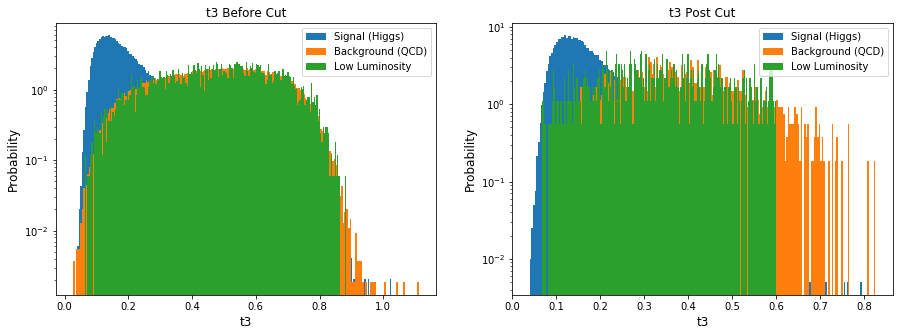

In [57]:
#t3 cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_t3 = high_cut['t3']
low_t3_and_mass_cut = low_t3[(low_t3 < .6) & (low_t3 >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t3 Before Cut')
ax[0].hist(signal_data['t3'],bins = 200, density = 'true')
ax[0].hist(background['t3'],bins = 200, density = 'true')
ax[0].hist(low_lum['t3'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t3', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t3 Post Cut')
ax[1].hist(sig_cut3['t3'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t3'], bins = 200, density = 'true')
ax[1].hist(low_t3_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t3', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

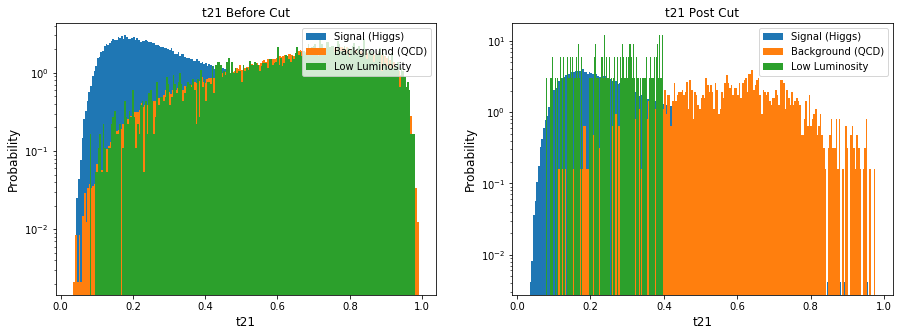

In [58]:
#t21 cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_t21 = high_cut['t21']
low_t21_and_mass_cut = low_t21[(low_t21 < .4) & (low_t21 >0)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t21 Before Cut')
ax[0].hist(signal_data['t21'],bins = 200, density = 'true')
ax[0].hist(background['t21'],bins = 200, density = 'true')
ax[0].hist(low_lum['t21'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t21', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t21 Post Cut')
ax[1].hist(sig_cut3['t21'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t21'], bins = 200, density = 'true')
ax[1].hist(low_t21_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t21', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()


[]

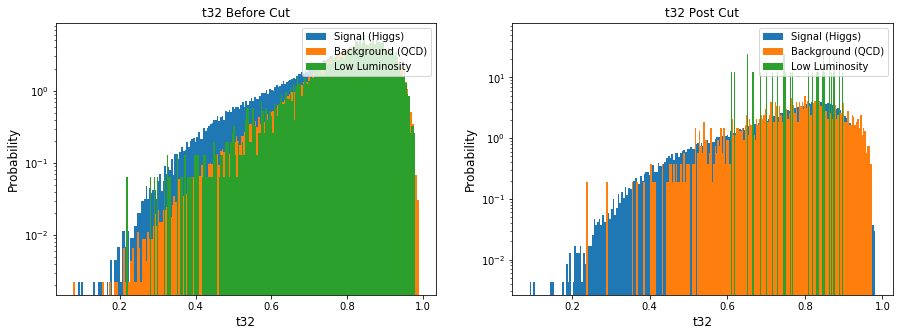

In [59]:
#t32 cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_t32 = low_cut['t32']
low_t32_and_mass_cut = low_t32[(low_t32 < .9) & (low_t32 >0.6)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('t32 Before Cut')
ax[0].hist(signal_data['t32'],bins = 200, density = 'true')
ax[0].hist(background['t32'],bins = 200, density = 'true')
ax[0].hist(low_lum['t32'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('t32', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('t32 Post Cut')
ax[1].hist(sig_cut3['t32'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['t32'], bins = 200, density = 'true')
ax[1].hist(low_t32_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('t32', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()



[]

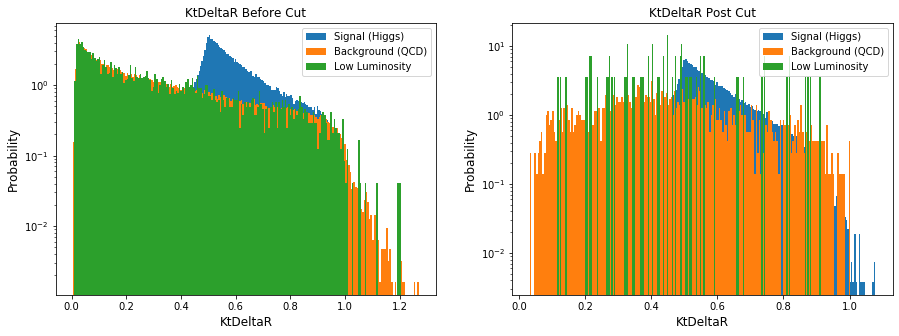

In [60]:
#KtDeltaR cut
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_KtDeltaR = low_cut['KtDeltaR']
low_KtDeltaR_and_mass_cut = low_KtDeltaR[(low_KtDeltaR < 1) & (low_KtDeltaR >0.1)]

fig,ax = plt.subplots(1,2)
ax[0].set_title('KtDeltaR Before Cut')
ax[0].hist(signal_data['KtDeltaR'],bins = 200, density = 'true')
ax[0].hist(background['KtDeltaR'],bins = 200, density = 'true')
ax[0].hist(low_lum['KtDeltaR'],bins = 200, density = 'true')
ax[0].set_ylabel('Probability', size = 12)
ax[0].set_xlabel('KtDeltaR', size = 12)
ax[0].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[0].semilogy()


ax[1].set_title('KtDeltaR Post Cut')
ax[1].hist(sig_cut3['KtDeltaR'], bins = 200, density = 'true')
ax[1].hist(backg_cut3['KtDeltaR'], bins = 200, density = 'true')
ax[1].hist(low_KtDeltaR_and_mass_cut, bins = 200, density = 'true')
ax[1].set_ylabel('Probability', size = 12)
ax[1].set_xlabel('KtDeltaR', size = 12)
ax[1].legend(['Signal (Higgs)', 'Background (QCD)', 'Low Luminosity'], loc = 'upper right')
ax[1].semilogy()


#### 3. 95% Confidence Level of signal yields
- In the low luminosity data, the observed significance is less than 5𝜎. We will calculate the 95% confidence level upper limit of signal yield.
- Evaluate the expected 95% confidence level upper limit
- Evaluate the observed 95% confidence level upper limit
- Compare expectation to observation. Comment on your finding.

In [63]:
low_val = (low_lum['mass'] > 124) & (low_lum['mass'] < 127) 
low_cut = low_lum[low_val]
low_d2 = low_cut['d2']
low_d2_and_mass_cut = low_d2[low_d2 < 1]

sig_d2=sig_cut3['d2']

sig_exp = 100*(len(high_lum['mass'])/100000)*(len(sig_d2[sig_d2 < 2])/100000)
up_lim_exp = stats.poisson.ppf(0.95, sig_exp)
up_lim_obs = stats.poisson.ppf(0.95,len(low_d2_and_mass_cut))

print('Expected: ', sig_exp)
print('Observed 95% confidence level upper limit: ', up_lim_obs)
print('Expected 95% confidence level upper limit: ', up_lim_exp)

Expected:  20.846551679999997
Observed 95% confidence level upper limit:  10.0
Expected 95% confidence level upper limit:  29.0


Here, the observed upper limit is 10 while the expected is 29. As we can see the exptected is greater than the observed this is what we want in order to optimize the significance. 